In [2]:
import json
import pandas as pd
from pathlib import Path
import numpy as np

In [3]:
folder_path = 'E:/work/data/waze-trafmine/2018/4'

In [4]:
def from_json_folder_to_json_docs(folder_path):
    pathlist = Path(folder_path).glob('**/*.json')
    json_docs = []
    for path in pathlist:
        # because path is object not string
        path_in_str = str(path)
        print('processing file: ' + path_in_str)
        with open(path_in_str, encoding="utf8") as f:
            json_file = json.load(f)
            json_docs.append(json_file)
    print('Done!')
    return json_docs

In [5]:
json_data = from_json_folder_to_json_docs(folder_path)

processing file: E:\work\data\waze-trafmine\2018\4\1-10.json
processing file: E:\work\data\waze-trafmine\2018\4\11-20.json
processing file: E:\work\data\waze-trafmine\2018\4\21-30.json
Done!


In [6]:
first_it = True
for json in json_data:
    #print(json.keys())
    if first_it != True:
        alerts_df.append(pd.DataFrame(json['alerts']), ignore_index=True)
        jams_df.append(pd.DataFrame(json['jams']), ignore_index=True)
    else:
        alerts_df = pd.DataFrame(json['alerts'])
        jams_df = pd.DataFrame(json['jams'])
        first_it = False

In [7]:
alerts_df.head()

,alert_subtype_id,alert_type_id,city,confidence,country,jam_uuid,last_seen,location,magvar,publish_date,reliability,report_by_partner,report_description,report_rating,road_type,street,thumbs_up,uuid
0,13.0,4,None,5,CI,None,2018-04-01T03:00:21+00:00,"[-70.646227, -33.635035]",265,2018-04-01T01:02:02+00:00,10,None,None,0,3.0,Ruta 79,0,8271e6bf-fca0-3cad-bac4-6a6959d16b1c
1,4.0,3,Conchalí,0,CI,None,2018-04-01T03:00:21+00:00,"[-70.670608, -33.398605]",56,2018-04-01T02:30:58+00:00,5,None,None,1,2.0,Av. Dorsal,0,e7b8841f-a144-3b7d-b685-05bc447b73fd
2,3.0,3,Ñuñoa,0,CI,None,2018-04-01T03:00:21+00:00,"[-70.575705, -33.469535]",2,2018-04-01T02:31:00+00:00,5,None,None,1,2.0,None,0,e1c149d5-4383-3490-bb2d-550156e3ad51
3,30.0,4,Las Condes,1,CI,None,2018-04-01T03:00:21+00:00,"[-70.578789, -33.423608]",321,2018-04-01T02:47:19+00:00,10,None,None,5,2.0,Av. Américo Vespucio Sur,0,ed5b472c-e1fa-3d35-a3fd-d8ba084b00d7
4,30.0,4,Maipú,1,CI,None,2018-04-01T03:05:19+00:00,"[-70.754093, -33.523078]",296,2018-04-01T02:21:05+00:00,8,None,None,2,1.0,Vicente Reyes,0,eee63ebc-94b6-32f8-a9e9-6fb392f64559


In [8]:
alerts_df.shape

(115547, 18)

In [9]:
jams_df.head()

,alert_uuid,city,country,end_node,last_seen,publish_date,revisions,road_type,start_node,street,turn_type,type,uuid
0,None,Independencia,CI,Av. Independencia,2018-04-01T03:00:21+00:00,2018-03-13T09:28:51+00:00,"[{'level': 5, 'length': 122, 'speed': 0, 'dela...",1,None,San Luis,NONE,NONE,1690519958
1,None,Independencia,CI,Carrión,2018-04-01T03:00:21+00:00,2018-03-13T09:28:52+00:00,"[{'level': 5, 'length': 114, 'speed': 0, 'dela...",2,None,Av. Independencia,NONE,NONE,1689021580
2,None,Quilicura,CI,San Luis,2018-04-01T03:00:21+00:00,2018-04-01T02:09:36+00:00,"[{'level': 4, 'length': 169, 'speed': 1.369444...",2,None,Av. General San Martín,NONE,NONE,1141252470
3,None,Estación Central,CI,Av. 5 de abril,2018-04-01T03:00:21+00:00,2018-04-01T02:49:03+00:00,"[{'level': 2, 'length': 239, 'speed': 1.705555...",1,None,Altarcillo,NONE,NONE,1148702766
4,None,San Ramón,CI,Javiera Carrera,2018-04-01T03:00:21+00:00,2018-04-01T02:49:04+00:00,"[{'level': 3, 'length': 174, 'speed': 1.219444...",1,None,Sargento Candelaria,NONE,NONE,1149163148


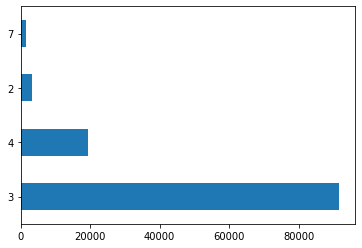

In [13]:
alerts_df['alert_type_id'].value_counts().plot(kind='barh')

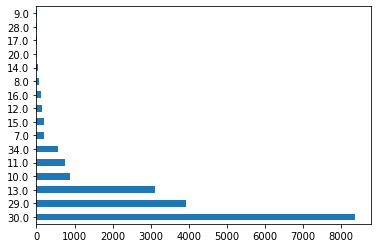

In [12]:
alerts_df['alert_subtype_id'][alerts_df['alert_type_id'] == 4].value_counts().plot(kind='barh')

In [14]:
print(np.sort(alerts_df['alert_subtype_id'].unique()))

[  1.   2.   3.   4.   5.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  20.  28.  29.  30.  31.  32.  33.  34.  nan]


In [15]:
print(np.sort(alerts_df['alert_subtype_id'][alerts_df['alert_type_id'] == 2].unique()))

[  1.   2.  nan]


In [16]:
print(np.sort(alerts_df['alert_subtype_id'][alerts_df['alert_type_id'] == 3].unique()))

[  3.   4.   5.  nan]


In [17]:
print(np.sort(alerts_df['alert_subtype_id'][alerts_df['alert_type_id'] == 4].unique()))

[  7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  20.  28.  29.  30.
  34.  nan]


In [19]:
print(np.sort(alerts_df['alert_subtype_id'][alerts_df['alert_type_id'] == 7].unique()))

[ 31.  32.  33.  nan]


I have to assume that 'alert_type_id' is 3 (JAM) and 'alert_subtype_id' 4 is JAM_HEAVY_TRAFFIC and 5 is JAM_STAND_STILL_TRAFFIC

In [20]:
alerts_df['publish_date_dt'] = pd.to_datetime(alerts_df['publish_date'])

In [21]:
alerts_df.head()

,alert_subtype_id,alert_type_id,city,confidence,country,jam_uuid,last_seen,location,magvar,publish_date,reliability,report_by_partner,report_description,report_rating,road_type,street,thumbs_up,uuid,publish_date_dt
0,13.0,4,None,5,CI,None,2018-04-01T03:00:21+00:00,"[-70.646227, -33.635035]",265,2018-04-01T01:02:02+00:00,10,None,None,0,3.0,Ruta 79,0,8271e6bf-fca0-3cad-bac4-6a6959d16b1c,2018-04-01 01:02:02+00:00
1,4.0,3,Conchalí,0,CI,None,2018-04-01T03:00:21+00:00,"[-70.670608, -33.398605]",56,2018-04-01T02:30:58+00:00,5,None,None,1,2.0,Av. Dorsal,0,e7b8841f-a144-3b7d-b685-05bc447b73fd,2018-04-01 02:30:58+00:00
2,3.0,3,Ñuñoa,0,CI,None,2018-04-01T03:00:21+00:00,"[-70.575705, -33.469535]",2,2018-04-01T02:31:00+00:00,5,None,None,1,2.0,None,0,e1c149d5-4383-3490-bb2d-550156e3ad51,2018-04-01 02:31:00+00:00
3,30.0,4,Las Condes,1,CI,None,2018-04-01T03:00:21+00:00,"[-70.578789, -33.423608]",321,2018-04-01T02:47:19+00:00,10,None,None,5,2.0,Av. Américo Vespucio Sur,0,ed5b472c-e1fa-3d35-a3fd-d8ba084b00d7,2018-04-01 02:47:19+00:00
4,30.0,4,Maipú,1,CI,None,2018-04-01T03:05:19+00:00,"[-70.754093, -33.523078]",296,2018-04-01T02:21:05+00:00,8,None,None,2,1.0,Vicente Reyes,0,eee63ebc-94b6-32f8-a9e9-6fb392f64559,2018-04-01 02:21:05+00:00


In [24]:
alerts_df.dtypes

alert_subtype_id                  float64
alert_type_id                       int64
city                               object
confidence                          int64
country                            object
jam_uuid                           object
last_seen                          object
location                           object
magvar                              int64
publish_date                       object
reliability                         int64
report_by_partner                  object
report_description                 object
report_rating                       int64
road_type                         float64
street                             object
thumbs_up                           int64
uuid                               object
publish_date_dt       datetime64[ns, UTC]
dtype: object

In [29]:
alerts_df = alerts_df[['alert_subtype_id', 'alert_type_id', 'street', 'publish_date_dt']]

In [30]:
alerts_df_jams = alerts_df[(alerts_df['alert_type_id'] == 3) & ((alerts_df['alert_subtype_id'] == 4) | (alerts_df['alert_subtype_id'] == 5))]

In [31]:
alerts_df_jams.head()

,alert_subtype_id,alert_type_id,street,publish_date_dt
1,4.0,3,Av. Dorsal,2018-04-01 02:30:58+00:00
9,4.0,3,Av. Teniente Luis Cruz Martínez,2018-04-01 02:38:08+00:00
14,4.0,3,Av. Américo Vespucio,2018-04-01 02:43:12+00:00
18,4.0,3,Av. La Florida,2018-04-01 02:45:24+00:00
22,4.0,3,Peaje Troncal Las Canteras,2018-04-01 02:49:27+00:00


In [32]:
alerts_df_jams = alerts_df_jams.set_index('publish_date_dt')

In [33]:
alerts_df_jams.head()

,alert_subtype_id,alert_type_id,street
publish_date_dt,,,
2018-04-01 02:30:58+00:00,4.0,3,Av. Dorsal
2018-04-01 02:38:08+00:00,4.0,3,Av. Teniente Luis Cruz Martínez
2018-04-01 02:43:12+00:00,4.0,3,Av. Américo Vespucio
2018-04-01 02:45:24+00:00,4.0,3,Av. La Florida
2018-04-01 02:49:27+00:00,4.0,3,Peaje Troncal Las Canteras


In [ ]:
.apply(list)

In [ ]:
def rolling_to_list(x,df,time_window):
    return df[df['street'] == x['street']].rolling(time_window).alert_subtype_id.list()
    